In [14]:
from file_combiner import transaction_compiler
from tests import map_test
from mapper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 40)

In [15]:
df = transaction_compiler()

In [16]:
df.head()

,Date,Description,Card Member,Account #,Amount,Extended Details,Appears On Your Statement As,Address,City/State,Zip Code,Country,Reference,Category,file_name,Details,Type,Balance,Check or Slip #,Transaction,Memo,bank,account_type,account_number,clean_description,month_name,month,year,month_year,is_recurring,not_nulls
0,2022-06-11,EXPRESS.COM,NaN,NaN,-36.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4649_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4649.0,EXPRESS.COM,June,6.0,2022.0,Jun-2022,0.0,15
1,2022-06-11,CITY OF NAPERVILLE,NaN,NaN,-176.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bills & Utilities,Chase_credit_4649_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4649.0,CITY OF NAPERVILLE,June,6.0,2022.0,Jun-2022,0.0,15
2,2022-06-11,AMZN Mktp US*EX2KA54K3,NaN,NaN,-42.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4434_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4434.0,AMZN Mktp US*EXKAK,June,6.0,2022.0,Jun-2022,0.0,15
3,2022-06-11,AMZN Mktp US*E93MN19E3,NaN,NaN,-53.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shopping,Chase_credit_4434_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,4434.0,AMZN Mktp US*EMNE,June,6.0,2022.0,Jun-2022,0.0,15
4,2022-06-11,worldmarket.com,NaN,NaN,-127.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,Chase_credit_3326_20220611_20240611,NaN,Sale,NaN,NaN,NaN,NaN,Chase,credit,3326.0,worldmarket.com,June,6.0,2022.0,Jun-2022,0.0,15


In [8]:
# map_test(df)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          3448 non-null   datetime64[ns]
 1   Description                   3448 non-null   object        
 2   Card Member                   726 non-null    object        
 3   Account #                     726 non-null    float64       
 4   Amount                        3448 non-null   float64       
 5   Extended Details              726 non-null    object        
 6   Appears On Your Statement As  726 non-null    object        
 7   Address                       643 non-null    object        
 8   City/State                    642 non-null    object        
 9   Zip Code                      642 non-null    object        
 10  Country                       644 non-null    object        
 11  Reference                     

In [47]:
null_cats = temp_df.loc[temp_df['Category'].isnull()]


#Remove all numbers from the description column to remove unique identifiers that could segment the descriptions unneccessarily
null_cats.loc[:,'Description'] = null_cats['Description'].str.replace('[0-9]','', regex=True)

val_counts = null_cats.value_counts('Description')


In [51]:
val_counts.values

array([90, 55, 53, 35, 32, 24, 24, 23, 23, 15, 15, 15, 15, 13, 11,  9,  8,
        7,  7,  6,  6,  6,  5,  5,  5,  4,  4,  3,  3,  3,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [52]:
val_counts.index

Index(['AMEX EPAYMENT    ACH PMT    A           WEB ID: ',
       'Payment to Chase card ending in  /', 'Payment Thank You - Web',
       'ONLINE PAYMENT - THANK YOU',
       'AMERICAN EXPRESS ACH PMT    W           WEB ID: ',
       'Online Payment  To First National Bank of Ottawa /',
       'DISCOVER BANK    PREARRANGE                 PPD ID: ',
       'AUTOMATIC PAYMENT - THANK',
       'CHASE CREDIT CRD AUTOPAY                    PPD ID: ',
       'AUTOPAY PAYMENT - THANK YOU',
       ...
       'DUPAGECHILDRENSMUS     HTTPSDUPAGECH IL',
       'DISCOVER BANK    PREARRANGE                 PPD ID: F',
       'DISCOVER BANK    NET/MOBILE             WEB ID: ',
       'DEPOSIT  ID NUMBER  ',
       'Credit Return: Online Payment  To BANK OF AMERICA, N.A.',
       'Collector Online onlinetax  DCITAX WEB ID: ',
       'CVS/PHARMACY #    NAPERVILLE    IL',
       'CHECK #       PASSPORTSERVICES PAYMENT           ARC ID:   ',
       'CASEYS FOODS  W GAR NAPERVILLE IL   /',
       'Zelle 

<Axes: ylabel='Description'>

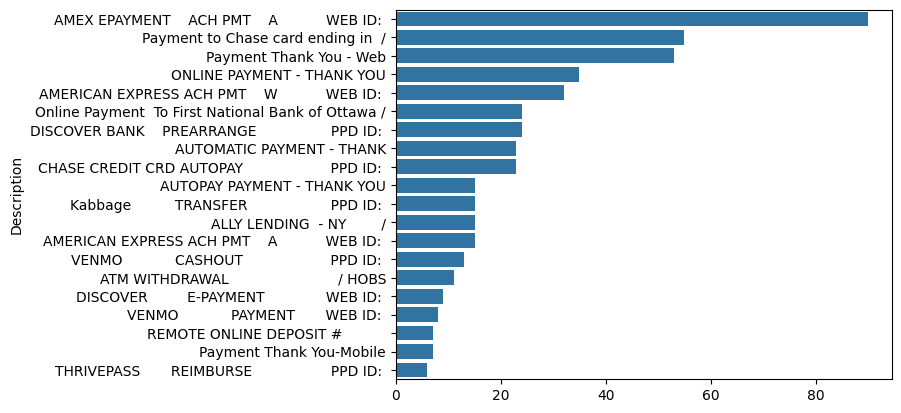

In [54]:
sns.barplot(y = val_counts.index[:20], x= val_counts.values[:20])

In [35]:
# cat_null = 

temp_df[temp_df['Category'].isnull()]['Description'].str.replace('[0-9]','', regex=True)

12                    Payment to Chase card ending in  /
13                    Payment to Chase card ending in  /
14                               Payment Thank You - Web
15                               Payment Thank You - Web
17                                              CHECK   
                              ...                       
3412    AMERICAN EXPRESS ACH PMT    W           WEB ID: 
3416                                 PAYMENT   THANK YOU
3417                          ONLINE PAYMENT - THANK YOU
3428                             Payment Thank You - Web
3431                  Payment to Chase card ending in  /
Name: Description, Length: 613, dtype: object

<Axes: ylabel='Description'>

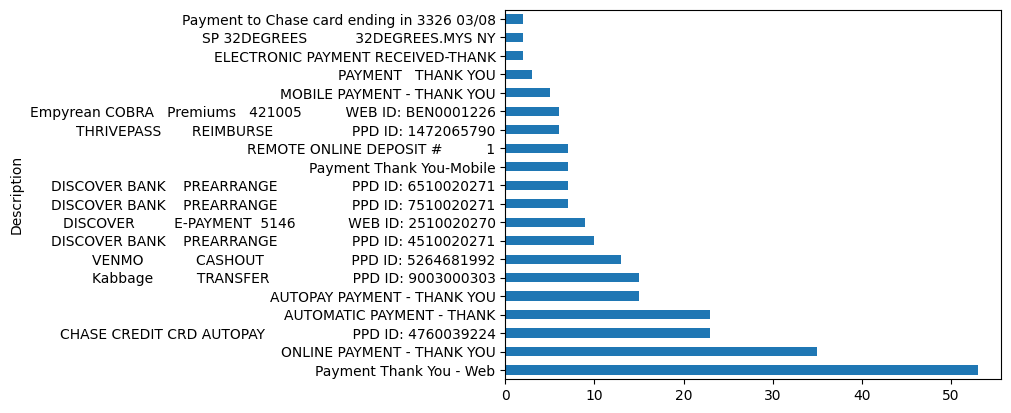

In [27]:
# temp_df = cat_mapper(df, 'Description','Category')
temp_df[temp_df['Category'].isnull()].value_counts('Description',ascending=False)[:20]